In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

from sklearn import preprocessing

import plotly.graph_objects as go # we can not use express plots
from plotly.subplots import make_subplots

In [2]:
CLIENT_ID = 'e0afbad55cac41aa87f580d64f35dbae'
CLIENT_SECRET = '55441d0542f846f098dba4074bf87772'
PLAYLIST_ID = 'https://open.spotify.com/playlist/37i9dQZF1DWSqmBTGDYngZ?si=40b3f8c30bb24b8a'

In [3]:
# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [5]:
tracks = get_playlist_tracks('spotify', PLAYLIST_ID)

track_name_df = pd.DataFrame(columns = ['track_uri','track_name','artist_name'])

for x in tracks:
    row_track_name_df = pd.DataFrame(columns = ['track_uri','track_name','artist_name'])
    row_track_name_df.loc[0] = [x['track']['uri'], x['track']['name'], x['track']['artists'][0]['name']]
    track_name_df = track_name_df.append(row_track_name_df)

track_name_df.head(4)

,track_uri,track_name,artist_name
0,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift
0,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles
0,spotify:track:4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta
0,spotify:track:3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars


In [6]:
# Getting features of tracks
counter = 0
features = []

for i in track_name_df['track_uri']:
    features = features + sp.audio_features(i)
    counter = counter + 1
    if counter%50 == 0:
        print(counter, end = ' ')

#turning features into a pandas dataframe
features_df = pd.DataFrame(features)

dataset = features_df.merge(track_name_df, left_on = 'uri', right_on = 'track_uri')[['track_uri','track_name','artist_name',
                                                                                     'danceability','energy','loudness',
                                                                                     'speechiness','acousticness','instrumentalness',
                                                                                     'liveness','tempo','valence']]

dataset.head(5)

50 100 150 200 

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
0,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,0.552,0.702,-5.707,0.1570,0.11700,0.000021,0.1050,169.994,0.564
1,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,173.930,0.662
2,spotify:track:4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,128.040,0.304
3,spotify:track:3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,0.726,0.698,-4.165,0.0431,0.04900,0.000000,0.3090,143.994,0.867
4,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,171.005,0.334


In [7]:
dataset.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.644545,0.690785,-6.165490,0.058474,0.196382,0.008749,0.164839,120.032385,0.576015
std,0.121793,0.179350,2.503318,0.053254,0.226283,0.058893,0.131370,24.300383,0.231424
min,0.262000,0.174000,-18.064000,0.022700,0.000202,0.000000,0.023200,67.531000,0.104000
25%,0.564000,0.574500,-7.057250,0.033725,0.029800,0.000000,0.085875,101.723500,0.415750
50%,0.653000,0.717000,-5.675500,0.043100,0.110000,0.000000,0.112000,118.967000,0.579000
75%,0.730250,0.832500,-4.609750,0.058850,0.269500,0.000030,0.201500,132.185250,0.765750
max,0.956000,0.970000,-2.392000,0.438000,0.946000,0.683000,0.792000,189.857000,0.978000


In [8]:
dataset.sort_values(by = 'danceability', ascending = False).round(2)

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
164,spotify:track:04KTF78FFg8sOHC1BADqbY,Hot In Herre,Nelly,0.96,0.74,-4.75,0.12,0.21,0.0,0.06,107.08,0.91
18,spotify:track:7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,Shawn Mendes,0.87,0.81,-4.06,0.06,0.38,0.0,0.08,122.00,0.97
195,spotify:track:4wCmqSrbyCgxEXROQE6vtV,Somebody That I Used To Know,Gotye,0.86,0.50,-7.04,0.04,0.59,0.0,0.10,129.06,0.72
48,spotify:track:32OlwWuMpZ6b0aN2RZOeMS,Uptown Funk (feat. Bruno Mars),Mark Ronson,0.86,0.61,-7.22,0.08,0.01,0.0,0.03,114.99,0.93
170,spotify:track:67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,0.85,0.55,-5.18,0.04,0.15,0.0,0.08,131.92,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...
19,spotify:track:003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,0.35,0.91,-5.23,0.07,0.00,0.0,0.10,148.03,0.24
165,spotify:track:4eHbdreAnSOrDDsFfc4Fpm,I Will Always Love You,Whitney Houston,0.33,0.21,-12.52,0.03,0.84,0.0,0.08,67.53,0.11
30,spotify:track:6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,0.32,0.72,-8.07,0.04,0.00,0.0,0.09,155.93,0.50
172,spotify:track:5VGlqQANWDKJFl0MBG3sg2,Use Somebody,Kings of Leon,0.28,0.72,-5.36,0.04,0.01,0.0,0.20,137.03,0.17


In [9]:
scaler = preprocessing.MinMaxScaler()
dataset[dataset.columns[3:]] = scaler.fit_transform(dataset[dataset.columns[3:]])
dataset.head(4)

,track_uri,track_name,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence
0,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,0.417867,0.663317,0.788476,0.323381,0.123491,0.000030,0.106400,0.837622,0.526316
1,spotify:track:4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,0.371758,0.699749,0.812021,0.079461,0.361386,0.001479,0.374350,0.869799,0.638444
2,spotify:track:4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta,0.430836,0.993719,0.918262,0.027932,0.003836,0.000010,0.452393,0.494654,0.228833
3,spotify:track:3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,0.668588,0.658291,0.886868,0.049121,0.051595,0.000000,0.371748,0.625076,0.872998


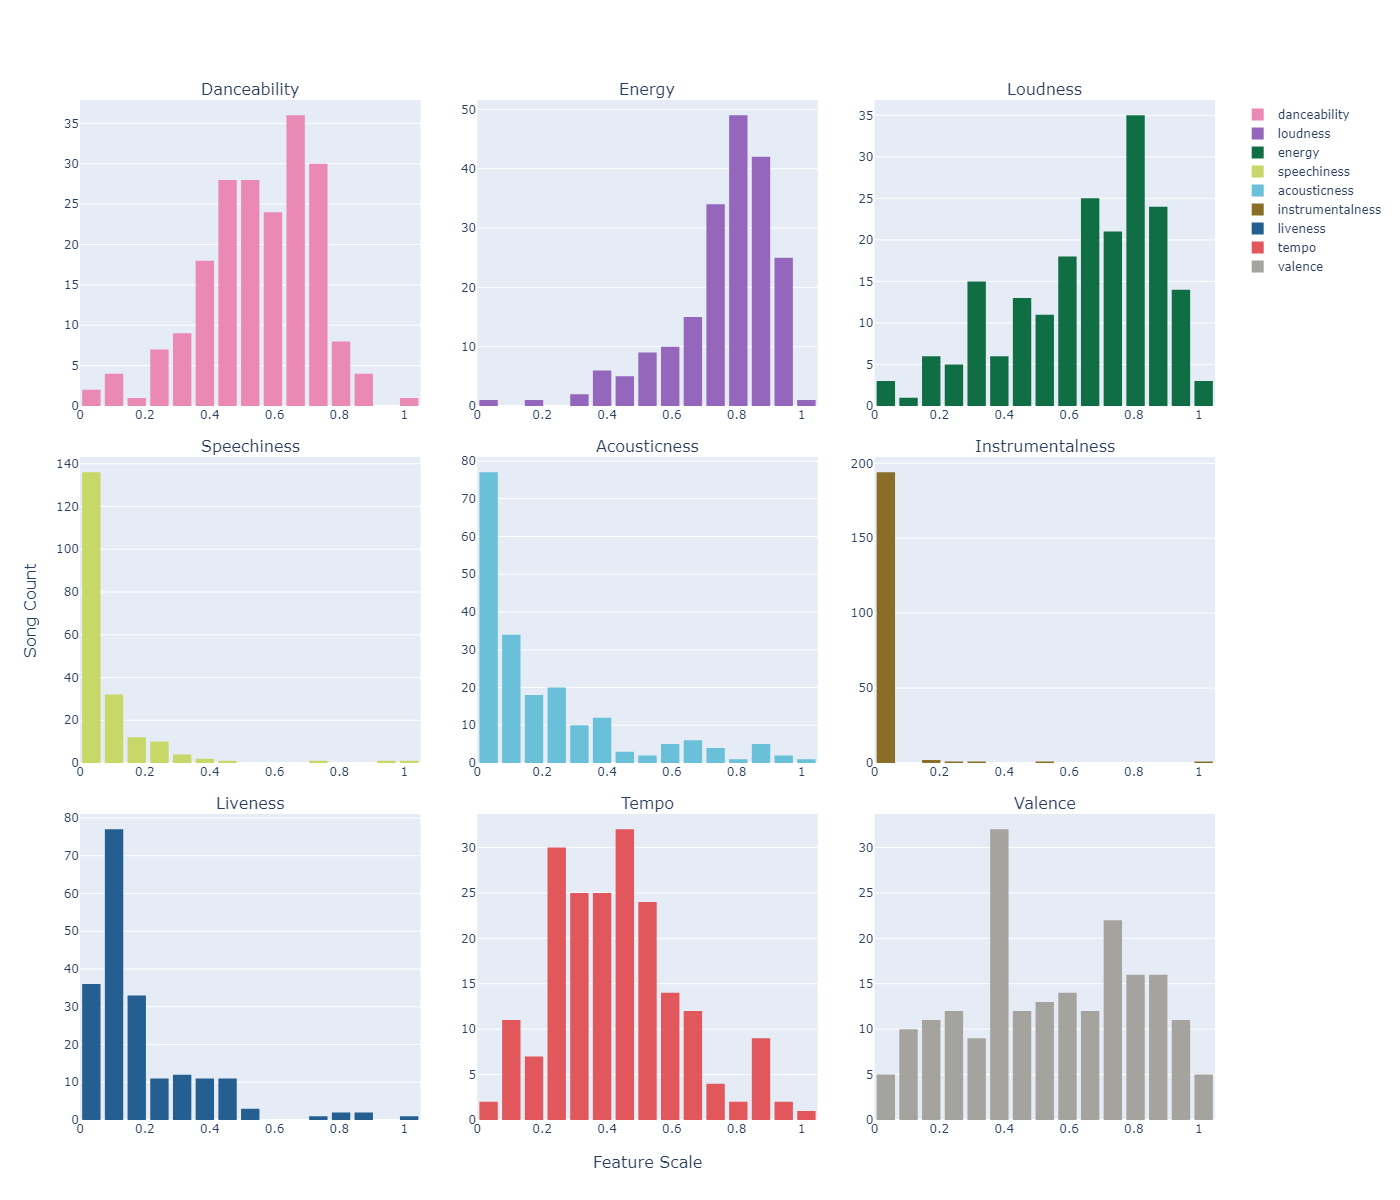

In [10]:
def add_trace_to_suplot(feature, color, row, col):
        return fig.add_trace(go.Histogram(x=dataset[feature],
                           marker_color=color,
                           xbins=dict(
                                    start=0,
                                    end=1.0,
                                    size=0.07),
                            name=feature,              
                            ),row=row, col=col)

fig = make_subplots(rows=3, cols=3,
                        subplot_titles=['Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness',
                                    'Instrumentalness', 'Liveness', 'Tempo', 'Valence'],
                        x_title='Feature Scale', y_title = 'Song Count',   
                        vertical_spacing = 0.05, horizontal_spacing=0.05)

add_trace_to_suplot('danceability','#EB89B5', 1, 1)

add_trace_to_suplot('loudness','#9467bd', 1, 2)

add_trace_to_suplot('energy','#106e45', 1, 3)

add_trace_to_suplot('speechiness','#C7D869', 2, 1)

add_trace_to_suplot('acousticness','#69C0D8', 2, 2)

add_trace_to_suplot('instrumentalness','#8A6E27', 2, 3)

add_trace_to_suplot('liveness','#255F92', 3, 1)

add_trace_to_suplot('tempo','#E2575B', 3, 2)

add_trace_to_suplot('valence','#A5A39D', 3, 3)

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height = 1200, width = 1400,
    paper_bgcolor="white"
    )


fig.show("png", height = 1200, width = 1400)

fig.write_image('spotify_features.png')